#PATH
Esto para la carpeta donde se ubican los datos para trabajar

In [1]:
cd drive/My\ Drive

/content/drive/My Drive


In [2]:
cd 9sem/aprendizaje\ maquina/lab2_logistic_regression

/content/drive/My Drive/9sem/aprendizaje maquina/lab2_logistic_regression


In [3]:
cd Data2

/content/drive/My Drive/9sem/aprendizaje maquina/lab2_logistic_regression/Data2


#funciones que son utiles

In [4]:
import numpy as np
def read_data(name):
  """.
  Parámetros:
  name -- nombre del documento 
  """
  data = [float(i.strip()) for i in open(name).readlines()]#el strip elimina el \n 
  #conversion a numpy arrray
  data = np.array(data)   
  return data
def normalize_max(data):
  """.
  devuelve: [datos normalizados, valor maximo encontrado]
  Parámetros:
  data -- datos para normalizar
  
  """
  maxData = data.max()
  data_n=data/maxData
  return [data_n,maxData]

def sigmoid(x):
  return 1/(1+np.exp(-x))

#Lectura de los datos

In [5]:
# lectura de datos
import numpy as np
weights =read_data("./weight200.dat")
heights = read_data("./height200.dat")
genders = read_data("./gender200.dat")
#normalizacion
[weights_n,max_weights]=normalize_max(weights)
[heights_n,max_heights]=normalize_max(heights)
print(max_heights,max_weights)


76.6001829545762 249.946283195065


#Gráfica de los datos

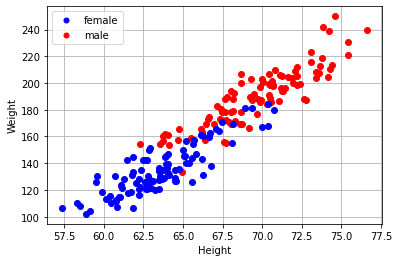

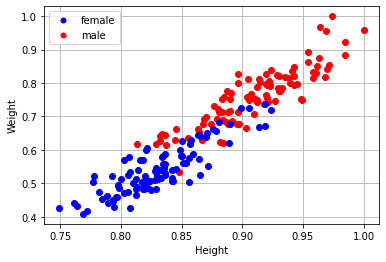

In [6]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==0:
    ax.plot(heights[i], weights[i], 'bo')
  else:
    ax.plot(heights[i], weights[i], 'ro')
female = mlines.Line2D([], [], color='blue', marker='o',linewidth=0,
                          markersize=5, label='female')
male = mlines.Line2D([], [], color='red', marker='o',linewidth=0,
                          markersize=5, label='male')
plt.legend(handles=[female,male])
fig.savefig("Height-Weight.png")
plt.show()

#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==0:
    ax.plot(heights_n[i], weights_n[i], 'bo')
  else:
    ax.plot(heights_n[i], weights_n[i], 'ro')
female = mlines.Line2D([], [], color='blue', marker='o',linewidth=0,
                          markersize=5, label='female')
male = mlines.Line2D([], [], color='red', marker='o',linewidth=0,
                          markersize=5, label='male')
plt.legend(handles=[female,male])
fig.savefig("Height_n-Weight_n.png")
plt.show()

#Entrenamiento


step: 0
learningRate 0.5
loss:  0.6931471805599465
gradient b: 0.0   gradient b0: -0.019407971011520146 gradient b1: -0.0535917855218883
b: 0.0 ,b0: 0.009703985505760073 b1: 0.02679589276094415



step: 0
learningRate 1
loss:  0.6931471805599465
gradient b: 0.0   gradient b0: -0.019407971011520146 gradient b1: -0.0535917855218883
b: 0.0 ,b0: 0.019407971011520146 b1: 0.0535917855218883



step: 0
learningRate 1.5
loss:  0.6931471805599465
gradient b: 0.0   gradient b0: -0.019407971011520146 gradient b1: -0.0535917855218883
b: 0.0 ,b0: 0.029111956517280217 b1: 0.08038767828283244



step: 0
learningRate 2
loss:  0.6931471805599465
gradient b: 0.0   gradient b0: -0.019407971011520146 gradient b1: -0.0535917855218883
b: 0.0 ,b0: 0.03881594202304029 b1: 0.1071835710437766



step: 0
learningRate 2.5
loss:  0.6931471805599465
gradient b: 0.0   gradient b0: -0.019407971011520146 gradient b1: -0.0535917855218883
b: 0.0 ,b0: 0.048519927528800355 b1: 0.13397946380472076




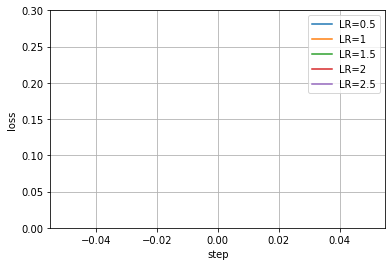

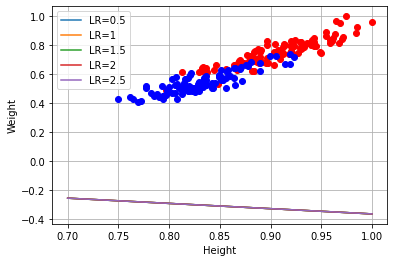

In [52]:
# Definición de los ajustes y parámetros iniciales
num_steps =200000
#entrenamiento con datos normalizados
trainX0=heights_n  
trainX1=weights_n
trainY=genders

learningRates=[.5,1,1.5,2,2.5]
#learningRates=[2,  2.5]
N=len(trainY)
#inicio de la graficas
fig_loss, ax_loss = plt.subplots()
ax_loss.grid()
ax_loss.set(xlabel='step', ylabel='loss')

fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==0:
    ax.plot(heights_n[i], weights_n[i], 'bo')
  else:
    ax.plot(heights_n[i], weights_n[i], 'ro')
#Proceso iterativo
for learningRate in learningRates:
  b = 0
  b0 = 0
  b1 = 0
  last_loss=0
  losses=[]
  for step in range(0, num_steps):
    b_gradient = 0
    b0_gradient = 0
    b1_gradient = 0
    loss=0
    #actualizar parametros al termino de un periodo
    for i in range(0, N):

      # calculo de los gradientes
      b_gradient +=(sigmoid(b + b0 * trainX0[i]+ b1 * trainX1[i])-trainY[i]) #la derivade de lo de adentro es 1
      b0_gradient +=(sigmoid(b +b0 * trainX0[i]+ b1 * trainX1[i])-trainY[i]) * trainX0[i] #(h(x)-y)*xi
      b1_gradient +=(sigmoid(b + b0 * trainX0[i]+ b1 * trainX1[i])-trainY[i]) * trainX1[i]

      #calculo del error
      #h(x)=(b + b0 * trainX0[i]+ b1 * trainX1[i])
      loss+= trainY[i]*np.log(sigmoid(b + b0 * trainX0[i]+ b1 * trainX1[i]))+(1-trainY[i])*np.log(1-sigmoid(b + b0 * trainX0[i]+ b1 * trainX1[i]))
    # actualizacion de pesos

    b =b -(learningRate * b_gradient/(N))
    b0 =b0 -(learningRate * b0_gradient/(N))
    b1 =b1 -(learningRate * b1_gradient/(N))
    
    #perdida promedio
    avg_loss=(loss/(N)*-1)
    losses.append(avg_loss)
    #convergencia
    if abs(last_loss-avg_loss)<0.00000001 or avg_loss>1000 or step==num_steps-1 :
      #imprime los parametros
      # print(last_loss,avg_loss)
      print("\nstep:",step)
      print("learningRate",learningRate)
      print("loss: ",avg_loss)
      print("gradient b:",b_gradient/N,"  gradient b0:",b0_gradient/N, "gradient b1:",b1_gradient/N)
      print("b:",b,",b0:",b0, "b1:",b1) 
      print("\n")
      #grafica de perdida
      x = np.linspace(0, len(losses)-1, len(losses))
      ax_loss.plot(x, losses,label="LR="+str(learningRate))
      # grafica de datos y modelo
      x = np.linspace(.7, 1, 101)#espacio de grafica del modelo
      ax.plot(x,-(b+b0*x)/b1,label="LR="+str(learningRate))
      break
    #asigna la perdida anterior  
    last_loss=avg_loss
#agrega leyenda y guarda las graficas
ax.legend()
fig.savefig("LR_model.png")
ax_loss.legend()
ax_loss.set(ylim=(0, .3))
fig_loss.savefig("LR_model_loss.png")
plt.show()

#Mejor resultado

In [15]:
  b = 1.6609535926207188
  b0 =-32.87561206808029
  b1 = 41.58810853037462

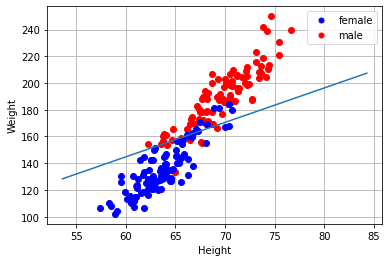

In [21]:
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
x = np.linspace(.7*max_heights, 1.1*max_heights, 101)
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==0:
    ax.plot(heights[i], weights[i], 'bo')
  else:
    ax.plot(heights[i], weights[i], 'ro')
female = mlines.Line2D([], [], color='blue', marker='o',linewidth=0,
                          markersize=5, label='female')
male = mlines.Line2D([], [], color='red', marker='o',linewidth=0,
                          markersize=5, label='male')
ax.plot(x,max_weights*(-(b+b0*(x/max_heights)))/b1,label="LR="+str(2.5))
plt.legend(handles=[female,male])
fig.savefig("Height-Weight.png")
plt.show()

#Exactitud del modelo

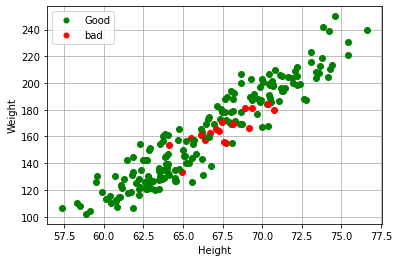

Percentage of examples classified correctly:  0.91


In [25]:
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
good_c=0
bad_c=0
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==round(sigmoid(b+b0*(heights[i]/max_heights)+b1*( weights[i]/max_weights))):
    ax.plot(heights[i], weights[i], 'go')
    good_c+=1
  else:
    ax.plot(heights[i], weights[i], 'ro')
    bad_c+=1
good = mlines.Line2D([], [], color='green', marker='o',linewidth=0,
                          markersize=5, label='Good')
bad = mlines.Line2D([], [], color='red', marker='o',linewidth=0,
                          markersize=5, label='bad')
plt.legend(handles=[good,bad])
fig.savefig("Good-bad.png")
plt.show()
print("Percentage of examples classified correctly: ",good_c/(good_c+bad_c))

#predicciones

In [26]:
sigmoid(b+b0*(71.731/max_heights)+b1*(220.042/max_weights))

0.9994402769337613

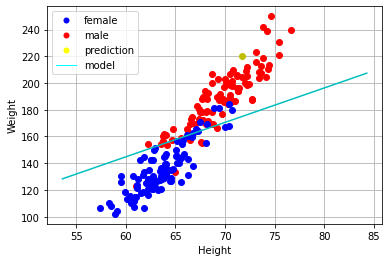

In [51]:
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='Height', ylabel='Weight')
x = np.linspace(.7*max_heights, 1.1*max_heights, 101)
for i in range(0, len(genders)):
  # gender=1 male gender=0 female
  if genders[i]==0:
    ax.plot(heights[i], weights[i], 'bo')
  else:
    ax.plot(heights[i], weights[i], 'ro')
female = mlines.Line2D([], [], color='blue', marker='o',linewidth=0,
                          markersize=5, label='female')
male = mlines.Line2D([], [], color='red', marker='o',linewidth=0,
                          markersize=5, label='male')
prediction = mlines.Line2D([], [], color='yellow', marker='o',linewidth=0,
                          markersize=5, label='prediction')
model = mlines.Line2D([], [], color='cyan', marker='' ,linewidth=1,
                          markersize=5, label='model')
ax.plot(x,max_weights*(-(b+b0*(x/max_heights)))/b1,'C')
ax.plot(71.731,220.042,'yo')
plt.legend(handles=[female,male,prediction,model],labels=["female","male","prediction","model"])
fig.savefig("prediction.png")
plt.show()